# Project Name:


In [1]:
#loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
import statistics as st
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

IMPORTING THE DATABASE

In [2]:
df = pd.read_csv("C:/DATA SCIENCE/Python/PyCharm Community Edition 2019.3.2/ASSIGNMENT/Flight1987(pyt).csv")
df

,w,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,Distance,DepDelay
0,10.0,14.0,3.0,741.0,730.0,912.0,849.0,1451.0,91.0,79.0,23.0,447.0,11.0
1,10.0,15.0,4.0,729.0,730.0,903.0,849.0,1451.0,94.0,79.0,14.0,447.0,-1.0
2,10.0,17.0,6.0,741.0,730.0,918.0,849.0,1451.0,97.0,79.0,29.0,447.0,11.0
3,10.0,18.0,7.0,729.0,730.0,847.0,849.0,1451.0,78.0,79.0,-2.0,447.0,-1.0
4,10.0,19.0,1.0,749.0,730.0,922.0,849.0,1451.0,93.0,79.0,33.0,447.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,12.0,14.0,1.0,830.0,830.0,940.0,930.0,244.0,70.0,60.0,10.0,214.0,0.0
1048571,12.0,15.0,2.0,830.0,830.0,936.0,930.0,244.0,66.0,60.0,6.0,214.0,0.0
1048572,12.0,16.0,3.0,905.0,830.0,959.0,930.0,244.0,54.0,60.0,29.0,214.0,35.0
1048573,12.0,17.0,4.0,830.0,830.0,940.0,930.0,244.0,70.0,60.0,10.0,214.0,0.0


DATA OVERVIEW STEPS BEFORE DATA CLEANING TO UNDERSTAND DATA

In [3]:
df.columns

Index(['w', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'ArrDelay', 'Distance', 'DepDelay'],
      dtype='object')

In [4]:
df.head()

,w,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,Distance,DepDelay
0,10.0,14.0,3.0,741.0,730.0,912.0,849.0,1451.0,91.0,79.0,23.0,447.0,11.0
1,10.0,15.0,4.0,729.0,730.0,903.0,849.0,1451.0,94.0,79.0,14.0,447.0,-1.0
2,10.0,17.0,6.0,741.0,730.0,918.0,849.0,1451.0,97.0,79.0,29.0,447.0,11.0
3,10.0,18.0,7.0,729.0,730.0,847.0,849.0,1451.0,78.0,79.0,-2.0,447.0,-1.0
4,10.0,19.0,1.0,749.0,730.0,922.0,849.0,1451.0,93.0,79.0,33.0,447.0,19.0


In [5]:
df_desc = df.describe(include='all')
df_desc

,w,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,Distance,DepDelay
count,1.047901e+06,1.047901e+06,1.047901e+06,1.033396e+06,1.047901e+06,1.030616e+06,1.047901e+06,1.047901e+06,1.030616e+06,1.047901e+06,1.030616e+06,1.047901e+06,1.033396e+06
mean,1.074126e+01,1.566071e+01,3.969954e+00,1.367889e+03,1.360862e+03,1.492472e+03,1.490278e+03,6.763935e+02,1.018124e+02,1.003505e+02,8.348465e+00,5.908147e+02,7.087709e+00
std,7.279427e-01,8.806336e+00,1.997856e+00,4.780236e+02,4.720585e+02,4.972475e+02,4.867260e+02,5.094130e+02,6.183117e+01,6.134016e+01,2.365067e+01,5.001233e+02,2.191540e+01
min,1.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.100000e+02,-1.000000e+01,-1.302000e+03,0.000000e+00,-1.345000e+03
25%,1.000000e+01,8.000000e+00,2.000000e+00,9.460000e+02,9.430000e+02,1.117000e+03,1.115000e+03,2.970000e+02,6.000000e+01,6.000000e+01,-3.000000e+00,2.480000e+02,0.000000e+00
50%,1.100000e+01,1.600000e+01,4.000000e+00,1.345000e+03,1.339000e+03,1.520000e+03,1.519000e+03,5.730000e+02,8.300000e+01,8.000000e+01,4.000000e+00,4.140000e+02,0.000000e+00
75%,1.100000e+01,2.300000e+01,6.000000e+00,1.750000e+03,1.741000e+03,1.917000e+03,1.911000e+03,9.050000e+02,1.280000e+02,1.270000e+02,1.300000e+01,7.830000e+02,7.000000e+00
max,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,4.938000e+03,1.654000e+03,1.555000e+03,1.033000e+03,4.983000e+03,1.439000e+03


DATA CLEANING PROCESS

In [6]:
#checking the shape of the data
df.shape

(1048575, 13)

In [7]:
df.dtypes

w                    float64
DayofMonth           float64
DayOfWeek            float64
DepTime              float64
CRSDepTime           float64
ArrTime              float64
CRSArrTime           float64
FlightNum            float64
ActualElapsedTime    float64
CRSElapsedTime       float64
ArrDelay             float64
Distance             float64
DepDelay             float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
w                    1047901 non-null float64
DayofMonth           1047901 non-null float64
DayOfWeek            1047901 non-null float64
DepTime              1033396 non-null float64
CRSDepTime           1047901 non-null float64
ArrTime              1030616 non-null float64
CRSArrTime           1047901 non-null float64
FlightNum            1047901 non-null float64
ActualElapsedTime    1030616 non-null float64
CRSElapsedTime       1047901 non-null float64
ArrDelay             1030616 non-null float64
Distance             1047901 non-null float64
DepDelay             1033396 non-null float64
dtypes: float64(13)
memory usage: 104.0 MB


In [9]:
#checking the variable type count in df
df.dtypes.value_counts()

float64    13
dtype: int64

PREPROCESSING

In [10]:
df.drop("w",axis=1,inplace=True)
for val in df:
    print(val,"",df[val].unique().shape)

DayofMonth  (32,)
DayOfWeek  (8,)
DepTime  (1422,)
CRSDepTime  (1144,)
ArrTime  (1441,)
CRSArrTime  (1276,)
FlightNum  (2142,)
ActualElapsedTime  (633,)
CRSElapsedTime  (410,)
ArrDelay  (596,)
Distance  (1014,)
DepDelay  (535,)


NULL VALUE ANALYSIS & TREATMENT

In [11]:
# Dealing with NaN.
df.isnull().any()

DayofMonth           True
DayOfWeek            True
DepTime              True
CRSDepTime           True
ArrTime              True
CRSArrTime           True
FlightNum            True
ActualElapsedTime    True
CRSElapsedTime       True
ArrDelay             True
Distance             True
DepDelay             True
dtype: bool

In [12]:
df.isnull()

,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,Distance,DepDelay
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,False,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

DayofMonth             674
DayOfWeek              674
DepTime              15179
CRSDepTime             674
ArrTime              17959
CRSArrTime             674
FlightNum              674
ActualElapsedTime    17959
CRSElapsedTime         674
ArrDelay             17959
Distance               674
DepDelay             15179
dtype: int64

In [14]:
for val in df:
 print(val, " ", (df[val].isnull().sum() / df.shape[0]) * 100)

DayofMonth   0.0642777102257826
DayOfWeek   0.0642777102257826
DepTime   1.4475836253963714
CRSDepTime   0.0642777102257826
ArrTime   1.7127053381970772
CRSArrTime   0.0642777102257826
FlightNum   0.0642777102257826
ActualElapsedTime   1.7127053381970772
CRSElapsedTime   0.0642777102257826
ArrDelay   1.7127053381970772
Distance   0.0642777102257826
DepDelay   1.4475836253963714


NO OF ROWS GETTING AFFECTED BY REMOVING NA'S

In [15]:
no_of_rows = df[df.isna().sum(axis=1) >= 1].shape[0]
no_of_rows

17959

% OF ROWS GETTING AFFECTED BY REMOVING NA'S

In [16]:
print((no_of_rows / df.shape[0]) * 100)

1.7127053381970772


% OF ROWS GETTING AFFECTED BY NA'S < 2%,WE CAN DROP THOSE ROWS

In [17]:
df= df.dropna()

In [18]:
# now check the na's after dropping
df.isnull().any()

DayofMonth           False
DayOfWeek            False
DepTime              False
CRSDepTime           False
ArrTime              False
CRSArrTime           False
FlightNum            False
ActualElapsedTime    False
CRSElapsedTime       False
ArrDelay             False
Distance             False
DepDelay             False
dtype: bool

In [19]:
df.shape

(1030616, 12)

CONVERTING NUMERICAL TO FACTOR

In [20]:
df["DayofMonth"] = df["DayofMonth"].astype("object")
df["DayOfWeek"] = df["DayOfWeek"].astype("object")

C:\Users\Nehal Debnath\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nehal Debnath\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
# Checking the single value value domination/biased
quasi_constant_feat = []
for feature in df.columns:
 dominant = (df[feature].value_counts() / np.float(len(df))).sort_values(ascending=False).values[0]
 if dominant > 0.95:
      quasi_constant_feat.append(feature)
print(quasi_constant_feat)

[]


TARGET VARIABLE ANALYSIS

In [22]:
df.rename(columns={'DepDelay':'tar_var'}, inplace=True)

C:\Users\Nehal Debnath\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [23]:
# Converting the tar_var into 0,1 class column.
lst =[]
for val in df.tar_var:
    x = "Yes" if(val > 20) else "NO"
    lst.append(x)
df["tar_var"] = lst
df.tar_var.replace({"NO" : 0,"Yes" : 1} ,inplace=True)

C:\Users\Nehal Debnath\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Nehal Debnath\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


MAKING A COPY OF CLEAN DATA

In [24]:
 data = df.copy()

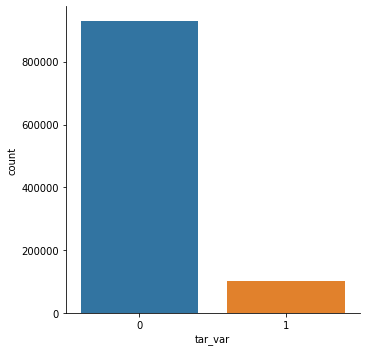

In [25]:
# Bar plot for tg variable
sns.catplot(x="tar_var", kind="count", data=df)

SEGREGATE THE DATA

In [26]:
df_num = df.select_dtypes(include=['int64','float64' ])
df_fac = df.select_dtypes(include=['object'])

In [27]:
df.dtypes

DayofMonth            object
DayOfWeek             object
DepTime              float64
CRSDepTime           float64
ArrTime              float64
CRSArrTime           float64
FlightNum            float64
ActualElapsedTime    float64
CRSElapsedTime       float64
ArrDelay             float64
Distance             float64
tar_var                int64
dtype: object

In [28]:
df_num

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,Distance,tar_var
0,741.0,730.0,912.0,849.0,1451.0,91.0,79.0,23.0,447.0,0
1,729.0,730.0,903.0,849.0,1451.0,94.0,79.0,14.0,447.0,0
2,741.0,730.0,918.0,849.0,1451.0,97.0,79.0,29.0,447.0,0
3,729.0,730.0,847.0,849.0,1451.0,78.0,79.0,-2.0,447.0,0
4,749.0,730.0,922.0,849.0,1451.0,93.0,79.0,33.0,447.0,0
...,...,...,...,...,...,...,...,...,...,...
1048570,830.0,830.0,940.0,930.0,244.0,70.0,60.0,10.0,214.0,0
1048571,830.0,830.0,936.0,930.0,244.0,66.0,60.0,6.0,214.0,0
1048572,905.0,830.0,959.0,930.0,244.0,54.0,60.0,29.0,214.0,1
1048573,830.0,830.0,940.0,930.0,244.0,70.0,60.0,10.0,214.0,0


In [29]:
df_fac

,DayofMonth,DayOfWeek
0,14,3
1,15,4
2,17,6
3,18,7
4,19,1
...,...,...
1048570,14,1
1048571,15,2
1048572,16,3
1048573,17,4


BAR PLOT OF CATEGORICAL DATA

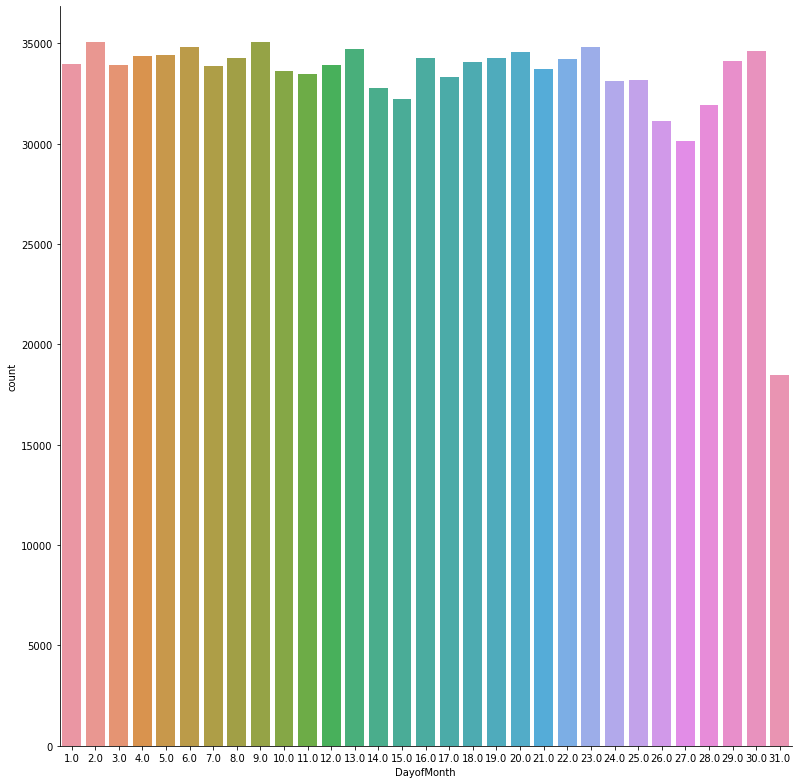

In [30]:
sns.catplot(x="DayofMonth", kind="count",height=11, data=df_fac)

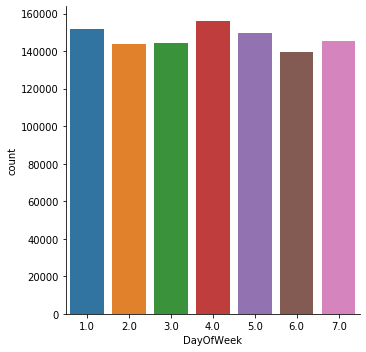

In [31]:
sns.catplot(x="DayOfWeek", kind="count", data=df_fac)

VARIABLE SIGNIFICANCE

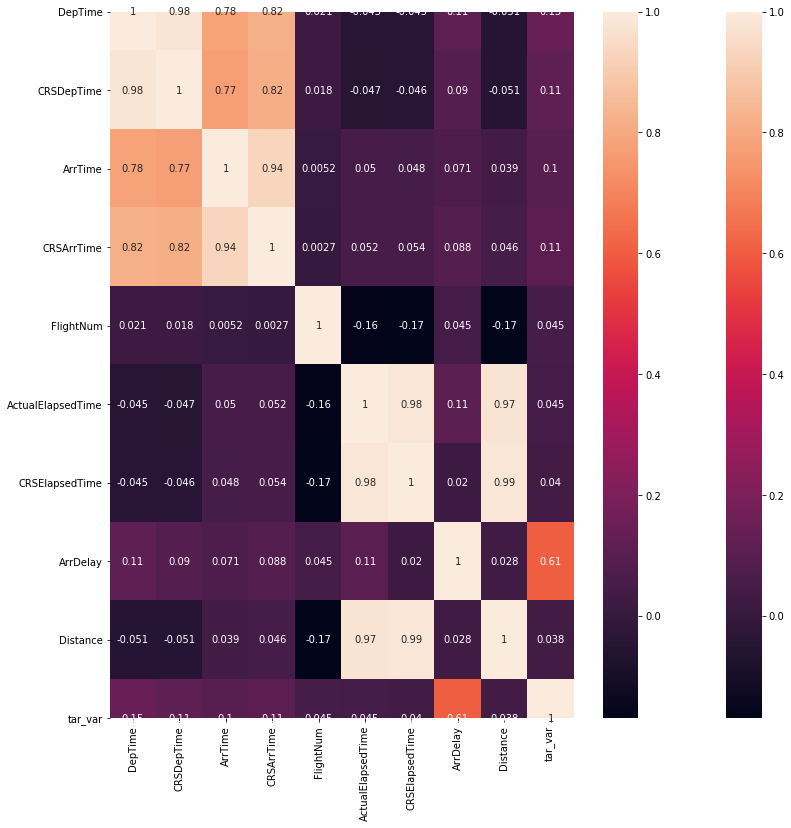

In [32]:
# Checking for co-relation
# corrplot
corrmat= df_num.corr()
fig,ax=plt.subplots()
fig.set_size_inches(13,13)
sns.heatmap(corrmat)
sns.heatmap(corrmat,annot=True)

In [33]:
# Which are the columns that should removed/highly correlated
def checkcorrelation(dataset, threshold):
                col_corr = set()
                cor_matrix = dataset.corr()
                for i in range(len(cor_matrix.columns)):
                    for j in range(i):
                        if abs(cor_matrix.iloc[i, j]) > threshold:
                            colname = cor_matrix.columns[i]
                            col_corr.add(colname)
                return col_corr

checkcorrelation(df_num, 0.8)

{'CRSArrTime', 'CRSDepTime', 'CRSElapsedTime', 'Distance'}

In [34]:
# drop the highly co-related columns
df_num.drop("CRSArrTime", axis=1, inplace=True)
df_num.drop("CRSDepTime", axis=1, inplace=True)
df_num.drop("CRSElapsedTime", axis=1, inplace=True)
df_num.drop("Distance", axis=1, inplace=True)

C:\Users\Nehal Debnath\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
df_num.columns

Index(['DepTime', 'ArrTime', 'FlightNum', 'ActualElapsedTime', 'ArrDelay',
       'tar_var'],
      dtype='object')

In [36]:
#clean data
New_df= df_num

TRAIN AND TEST SPLIT OF DATA

In [37]:
New_df.columns

Index(['DepTime', 'ArrTime', 'FlightNum', 'ActualElapsedTime', 'ArrDelay',
       'tar_var'],
      dtype='object')

In [38]:
tar_var = New_df['tar_var']

In [39]:
New_df.drop("tar_var", axis=1, inplace=True)

SPLITTING NOW

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(New_df, tar_var, random_state = 10,test_size = 0.3)

In [41]:
x_train.shape

(721431, 5)

In [42]:
y_train.shape

(721431,)

In [43]:
x_test.shape

(309185, 5)

In [44]:
y_test.shape

(309185,)

# BUILDING LOGISTIC MODEL

In [45]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression().fit(x_train, y_train)

C:\Users\Nehal Debnath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
y_test_pred = clf.predict(x_test)

CONFUSION MATRIX

In [47]:
confusion= metrics.confusion_matrix(y_test, y_test_pred)
confusion

array([[275290,   3425],
       [ 11240,  19230]], dtype=int64)

In [48]:
#Checking Accuracy
accuracy =accuracy_score(y_test,y_test_pred)
accuracy

0.9525688503646684

In [49]:
sensitivity=(metrics.recall_score(y_test, y_test_pred))
sensitivity

0.6311125697407286

In [50]:
precision=(metrics.precision_score(y_test, y_test_pred))
precision

0.8488192451997352

In [51]:
F1 = 2 * (precision * sensitivity) / (precision + sensitivity)
F1

0.7239529411764707

In [52]:
#Printing Accuracy, precision, sensitivity and F1 score
print('Accuracy =',accuracy)
print('precision =',precision)
print('Recall =', sensitivity)
print('F1=', F1)

Accuracy = 0.9525688503646684
precision = 0.8488192451997352
Recall = 0.6311125697407286
F1= 0.7239529411764707


AUROC CURVE

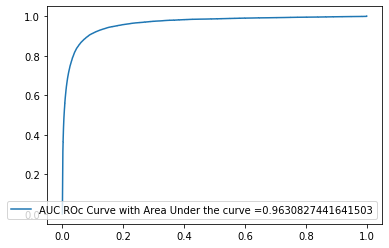

In [53]:
def generate_auc_roc_curve(clf, x_test):
    y_pred_proba = clf.predict_proba(x_test)[:,1]
    fpr, tpr, thresold = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test , y_pred_proba)
    plt.plot(fpr, tpr,label ='AUC ROc Curve with Area Under the curve ='+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

generate_auc_roc_curve(clf , x_test)


# DECISION TREE

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

FEATURE IMPORTANCE

In [55]:
dt.feature_importances_

array([0.09800941, 0.08622314, 0.10044647, 0.10805279, 0.60726819])

In [56]:
var_imp = pd.DataFrame({"Variable" :x_train.columns,"Score" : dt.feature_importances_})
var_imp.sort_values("Score" , ascending = False)

,Variable,Score
4,ArrDelay,0.607268
3,ActualElapsedTime,0.108053
2,FlightNum,0.100446
0,DepTime,0.098009
1,ArrTime,0.086223


In [57]:
#Making Predictions
y_test_pred= dt.predict(x_test)

In [58]:
#confusion matrix
confusion1=confusion_matrix(y_test,y_test_pred)
confusion1

array([[270338,   8377],
       [  8605,  21865]], dtype=int64)

In [59]:
#Checking Accuracy
accuracy=accuracy_score(y_test,y_test_pred)
sensitivity=(metrics.recall_score(y_test, y_test_pred))
precision=(metrics.precision_score(y_test, y_test_pred))
F1 = 2 * (precision * sensitivity) / (precision + sensitivity)

PRINTING ACCURACY PRECISION RECALL AND F1 SCORE OF DECISION TREE

In [60]:
print('Accuracy =',accuracy)
print('precision =',precision)
print('Recall =', sensitivity)
print('F1=', F1)

Accuracy = 0.9450749551239549
precision = 0.7230011242642682
Recall = 0.7175910731867411
F1= 0.7202859401765712


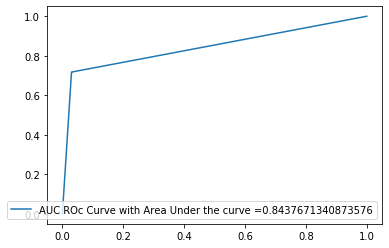

In [61]:
#Auc roc curve of Decision Tree
def generate_auc_roc_curve(dt , x_test):
    y_pred_proba = dt.predict_proba(x_test)[:,1]
    fpr, tpr, thresold = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test , y_pred_proba)
    plt.plot(fpr, tpr,label ='AUC ROc Curve with Area Under the curve ='+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

generate_auc_roc_curve(dt , x_test)

# RANDOM FOREST

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier().fit(x_train,y_train)

C:\Users\Nehal Debnath\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [63]:
rf.feature_importances_

array([0.1075076 , 0.09190042, 0.09136682, 0.10267096, 0.6065542 ])

In [64]:
var_imp = pd.DataFrame({"Variable" :x_train.columns,"Score" : rf.feature_importances_})
var_imp.sort_values("Score" , ascending = False)

,Variable,Score
4,ArrDelay,0.606554
0,DepTime,0.107508
3,ActualElapsedTime,0.102671
1,ArrTime,0.091900
2,FlightNum,0.091367


In [65]:
#THIS MEANS THAT ALL THE FEATURES ADD UP TO 1.
rf.feature_importances_.sum()

1.0

In [66]:
#Making Predictions
y_test_pred= rf.predict(x_test)

In [67]:
#confusion matrix
confusion1=confusion_matrix(y_test,y_test_pred)
confusion1

array([[275124,   3591],
       [  8831,  21639]], dtype=int64)

In [68]:
#Checking Accuracy
accuracy=accuracy_score(y_test,y_test_pred)
sensitivity=(metrics.recall_score(y_test, y_test_pred))
precision=(metrics.precision_score(y_test, y_test_pred))
F1 = 2 * (precision * sensitivity) / (precision + sensitivity)

In [69]:
#Printing accuracy precision recall and f1 score of Random forest
print('Accuracy =',accuracy)
print('precision =',precision)
print('Recall =', sensitivity)
print('F1=', F1)

Accuracy = 0.959823406698255
precision = 0.8576694411414982
Recall = 0.7101739415818838
F1= 0.776983842010772


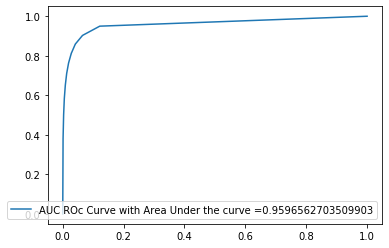

In [70]:
#Auroc curve of Random Forest
def generate_auc_roc_curve(rf, x_test):
    y_pred_proba = rf.predict_proba(x_test)[:,1]
    fpr, tpr, thresold = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test , y_pred_proba)
    plt.plot(fpr, tpr,label ='AUC ROc Curve with Area Under the curve ='+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

generate_auc_roc_curve(rf , x_test)